In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
#Dataset The World Happiness Report is powered by data from the Gallup World Poll.World Happiness Report 2025
filepath = r"d:\UE\DATA_VISUALISATION\PROJECT\WHR25_Data_Figure_2.1.xlsx"
df2025=pd.read_excel(filepath)

1- Load and Pre-process the Dataset 


In [35]:
df2025.head()

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [36]:
df2025.columns

Index(['Year', 'Rank', 'Country name', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

Data Cleaning

In [37]:
#Simplifying Column names

df2025.rename(columns={
    'Year': 'year',
    'Rank': 'rank',
    'Country name': 'country',
    'Ladder score': 'score',
    'Explained by: Log GDP per capita': 'gdp',
    'Explained by: Social support': 'social_support',
    'Explained by: Healthy life expectancy': 'health',
    'Explained by: Freedom to make life choices': 'freedom',
    'Explained by: Generosity': 'generosity',
    'Explained by: Perceptions of corruption': 'corruption',
    'Dystopia + residual': 'dystopia_residual'
}, inplace=True)

In [38]:
df2025

,year,rank,country,score,upperwhisker,lowerwhisker,gdp,social_support,health,freedom,generosity,corruption,dystopia_residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016,138,Zimbabwe,3.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,2015,131,Zimbabwe,4.193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,2014,115,Zimbabwe,4.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,2012,103,Zimbabwe,4.827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Handling missing values
missing_values = df2025.isnull().sum()
total_values = len (df2025)

In [40]:
missing_percentage = missing_values/total_values
missing_percentage

year                 0.000000
rank                 0.000000
country              0.000000
score                0.000000
upperwhisker         0.555612
lowerwhisker         0.555612
gdp                  0.557136
social_support       0.557136
health               0.558151
freedom              0.557643
generosity           0.557136
corruption           0.557643
dystopia_residual    0.559167
dtype: float64

In [41]:
#removing unused datas
df2025 = df2025[df2025["year"] >=2020]

In [42]:
missing_values = df2025.isnull().sum()
total_values = len (df2025)
missing_values

year                 0
rank                 0
country              0
score                0
upperwhisker         0
lowerwhisker         0
gdp                  3
social_support       3
health               5
freedom              4
generosity           3
corruption           4
dystopia_residual    7
dtype: int64

In [43]:
missing_percentage = missing_values/total_values
missing_percentage

year                 0.000000
rank                 0.000000
country              0.000000
score                0.000000
upperwhisker         0.000000
lowerwhisker         0.000000
gdp                  0.004155
social_support       0.004155
health               0.006925
freedom              0.005540
generosity           0.004155
corruption           0.005540
dystopia_residual    0.009695
dtype: float64

In [44]:
df2025

,year,rank,country,score,upperwhisker,lowerwhisker,gdp,social_support,health,freedom,generosity,corruption,dystopia_residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,2024,147,Afghanistan,1.364,1.427,1.301,0.649,0.000,0.155,0.000,0.075,0.135,0.348
1957,2023,138,Zimbabwe,3.341,3.457,3.226,0.748,0.850,0.232,0.487,0.096,0.131,0.797
1958,2022,134,Zimbabwe,3.204,3.323,3.084,0.758,0.881,0.069,0.363,0.112,0.117,0.905
1959,2021,144,Zimbabwe,2.995,3.110,2.880,0.947,0.690,0.270,0.329,0.106,0.105,0.548


In [45]:
df2025 = df2025.dropna()

In [46]:
df2025.isnull().sum().sum()

0

In [47]:
df2025.head(20)

,year,rank,country,score,upperwhisker,lowerwhisker,gdp,social_support,health,freedom,generosity,corruption,dystopia_residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
14,2023,87,Albania,5.304,5.440,5.168,1.438,0.924,0.638,0.690,0.138,0.049,1.428
15,2022,83,Albania,5.277,5.406,5.148,1.449,0.951,0.480,0.549,0.133,0.037,1.678
16,2021,90,Albania,5.199,5.321,5.076,1.439,0.646,0.719,0.511,0.138,0.028,1.718
17,2020,94,Albania,5.117,5.234,5.001,1.008,0.529,0.646,0.491,0.168,0.024,2.250


2-Visualize Happiness Score Distribution 


In [48]:
print(df2025['score'].describe())


count    715.000000
mean       5.548513
std        1.127267
min        1.364000
25%        4.781000
50%        5.716000
75%        6.377500
max        7.842000
Name: score, dtype: float64


d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



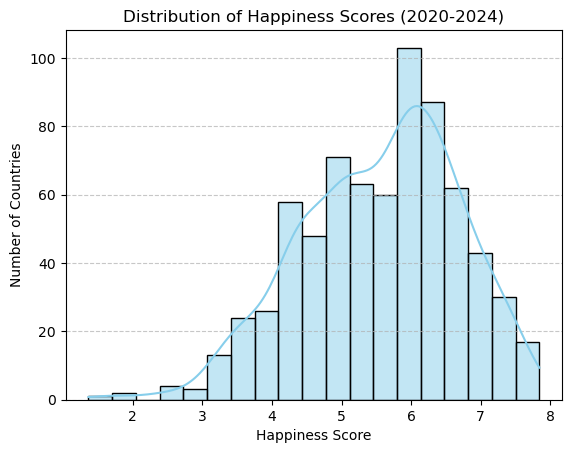

In [49]:
sns.histplot(df2025['score'], kde=True, color="skyblue", edgecolor='black')
plt.title('Distribution of Happiness Scores (2020-2024)')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3- Top and Bottom 10 Happiest Countries of 2024


In [50]:
df2024 = df2025[df2025["year"] == 2024]


In [51]:
top10 = df2024.sort_values(by="score", ascending=False).head(10)
bottom10= df2024.sort_values(by="score", ascending=True).head(10)

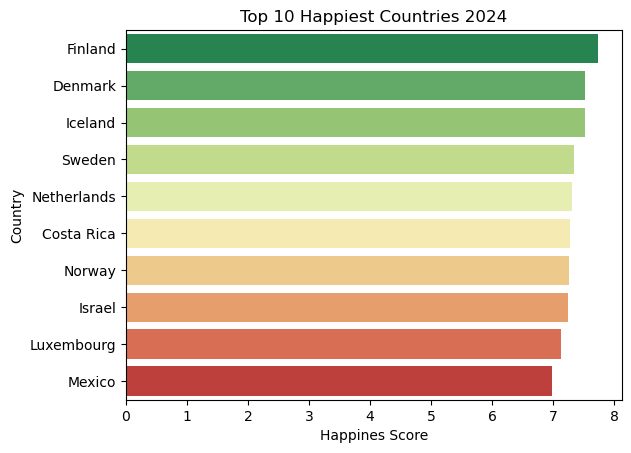

In [52]:
#top 10 happiest countries 
sns.barplot( x= top10["score"], y = top10["country"], palette="RdYlGn_r")
plt.title("Top 10 Happiest Countries 2024")
plt.xlabel ("Happines Score")
plt.ylabel("Country")
plt.show()

4-Correlation of happiness and Indicators 


In [53]:

corr = df2024[['score', 'gdp', 'social_support', 'health', 'freedom', 'generosity', 'corruption']].corr()
print(corr['score'].sort_values(ascending=False))


score             1.000000
social_support    0.817428
gdp               0.763781
health            0.714674
freedom           0.632267
corruption        0.416878
generosity        0.047864
Name: score, dtype: float64


d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

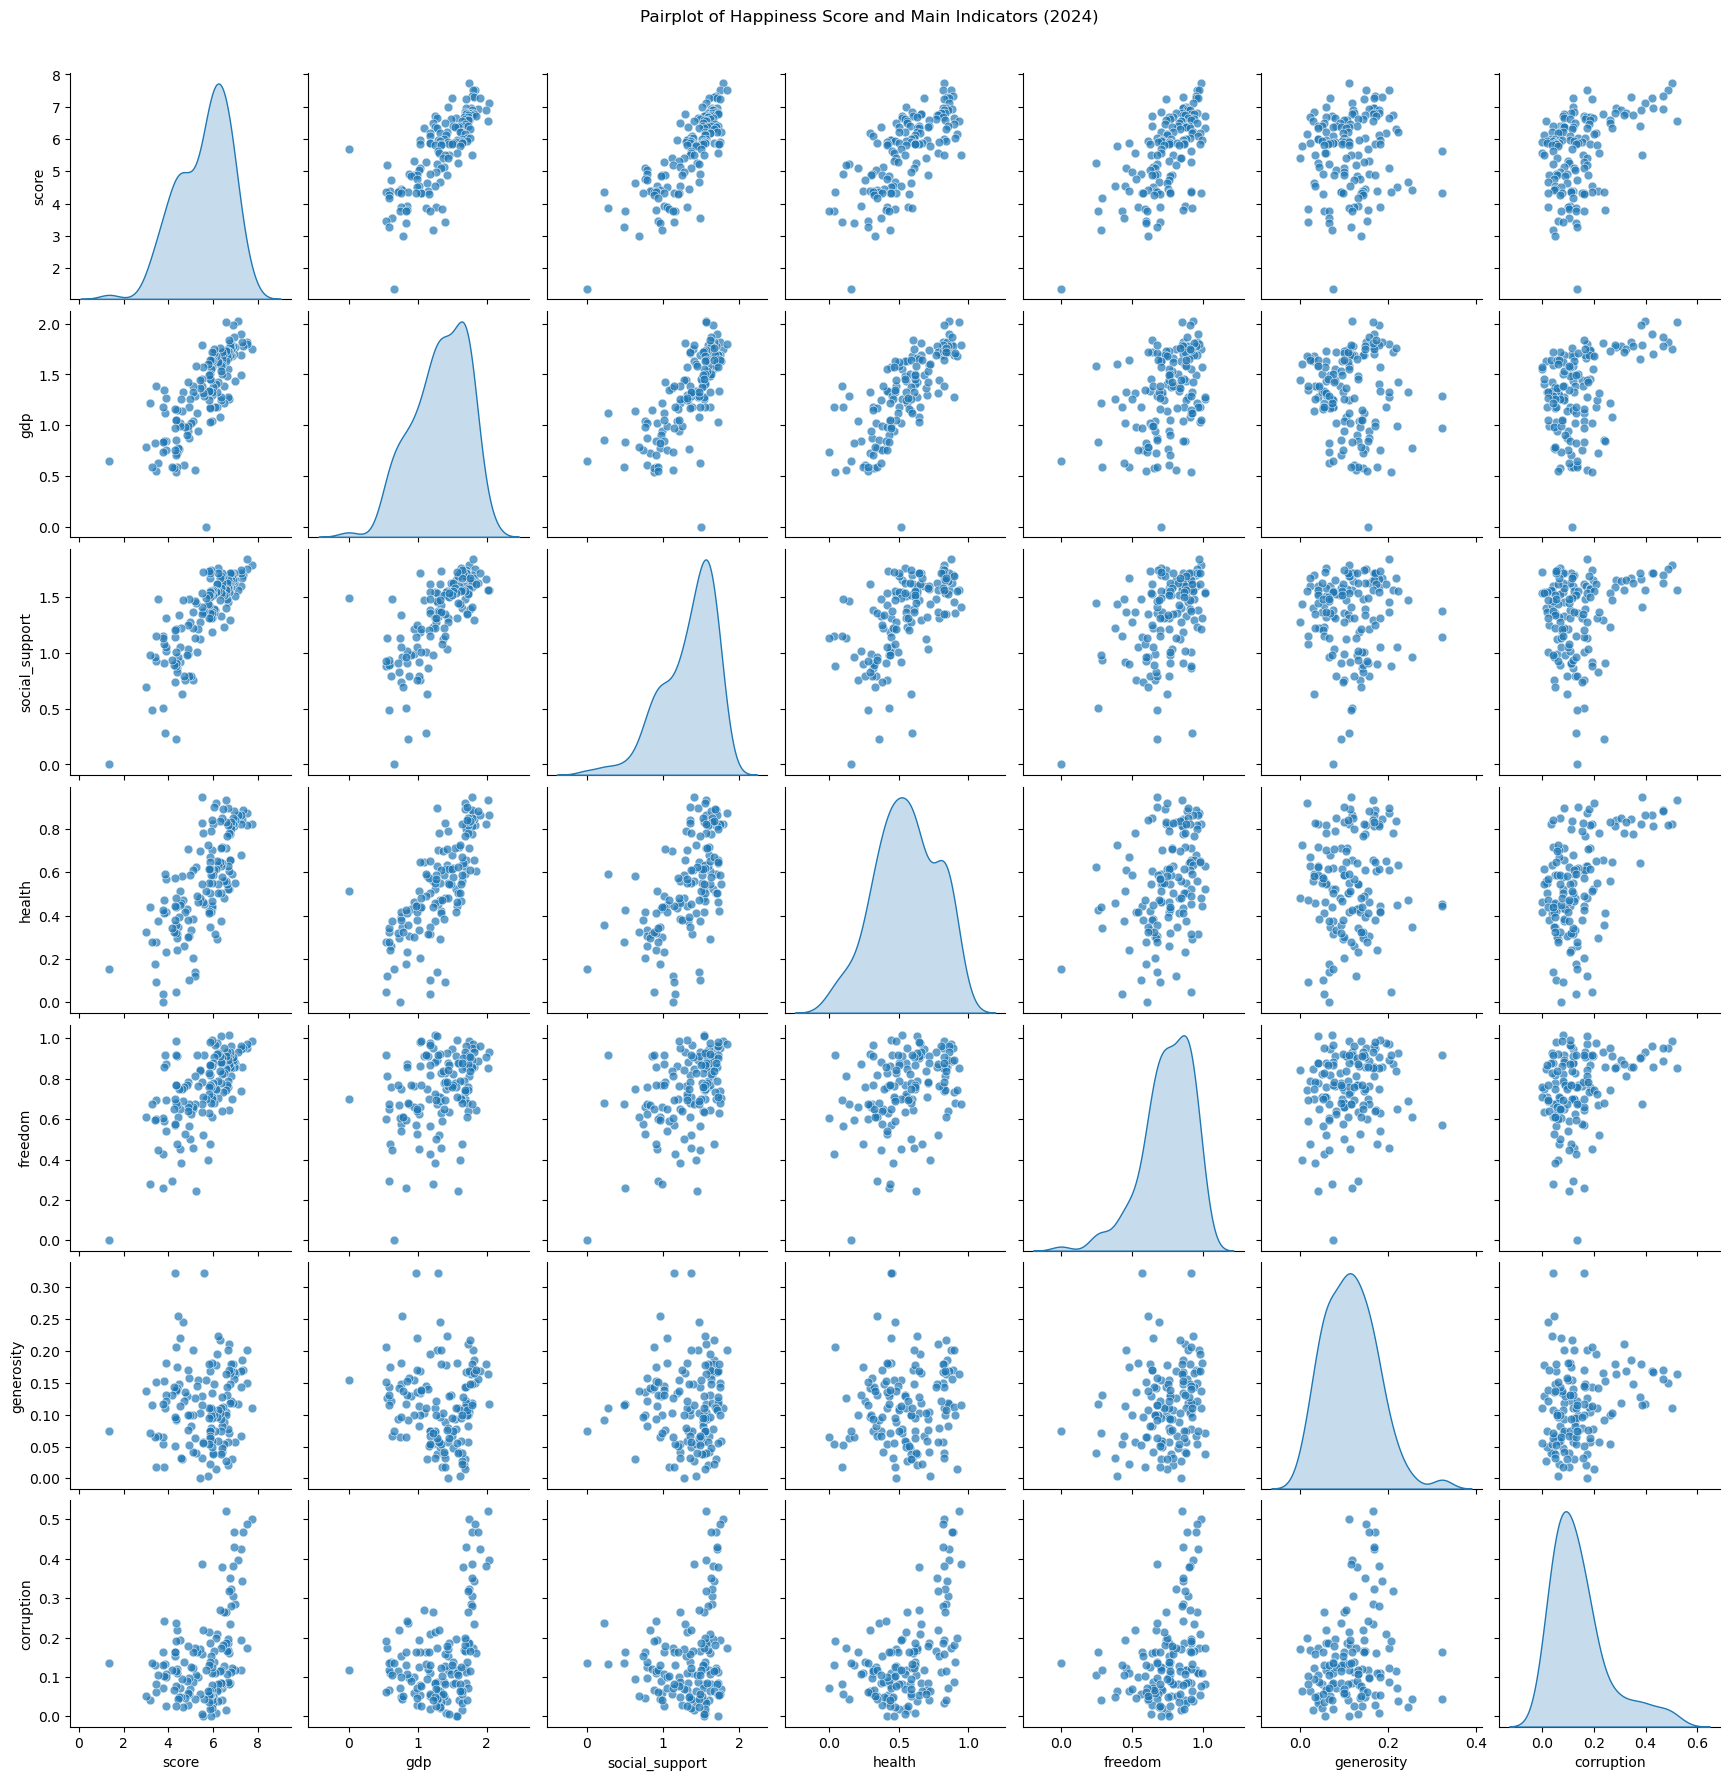

In [54]:
# Pairplot to check all correlations

cols = ['score', 'gdp', 'social_support', 'health', 'freedom', 'generosity', 'corruption']

sns.pairplot(df2024[cols], diag_kind="kde", plot_kws={"alpha": 0.7, "s": 40})
plt.suptitle("Pairplot of Happiness Score and Main Indicators (2024)", y=1.02)
plt.show()

5- Year-over-Year Comparison 


In [55]:
top5_countries = df2025.sort_values(["year","score"], ascending=[True , False]).groupby("year").head(5)["country"].unique()
df_top5 = df2025[df2025['country'].isin(top5_countries)]


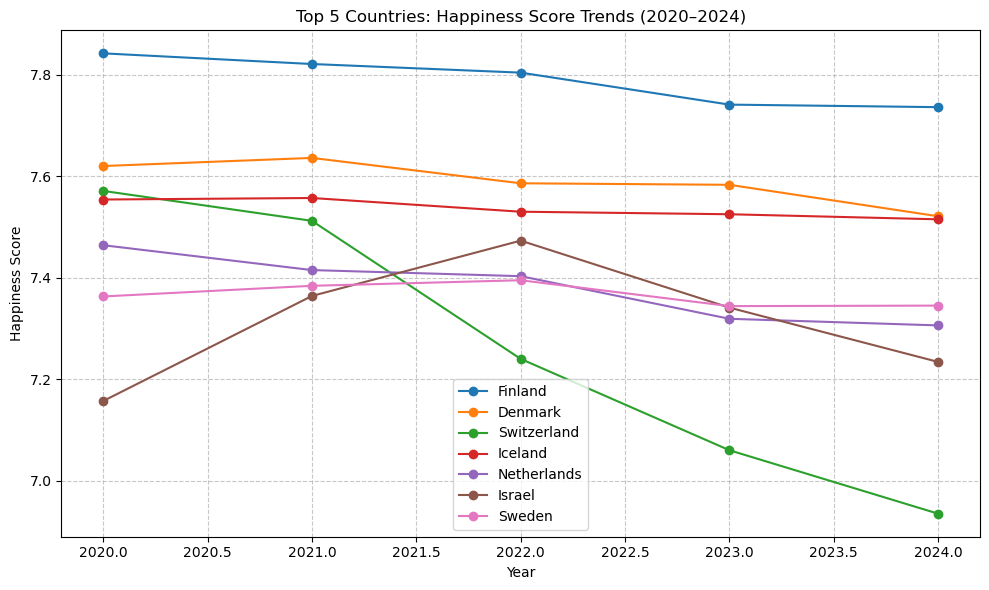

In [56]:
plt.figure(figsize=(10,6))
for country in top5_countries:
    country_data = df_top5[df_top5['country'] == country]
    plt.plot(country_data['year'], country_data['score'], marker='o', label=country)

plt.title('Top 5 Countries: Happiness Score Trends (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

6- World Map of Happiness 

In [57]:
import plotly.express as px

In [58]:
fig= px.choropleth(
    df2024,
    locations= "country" ,
    locationmode= "country names",
    color = "score",
    color_continuous_scale= "RdYlGn",
    title= "World Happiness Scores by Country 2024",
    labels ={"score":"Happines Score"},
    hover_name= "country"
)
fig.update_geos(showcoastlines=True, showland=True, landcolor="white", projection_type="natural earth")
fig.show()

7- Impact of GDP on Happiness 


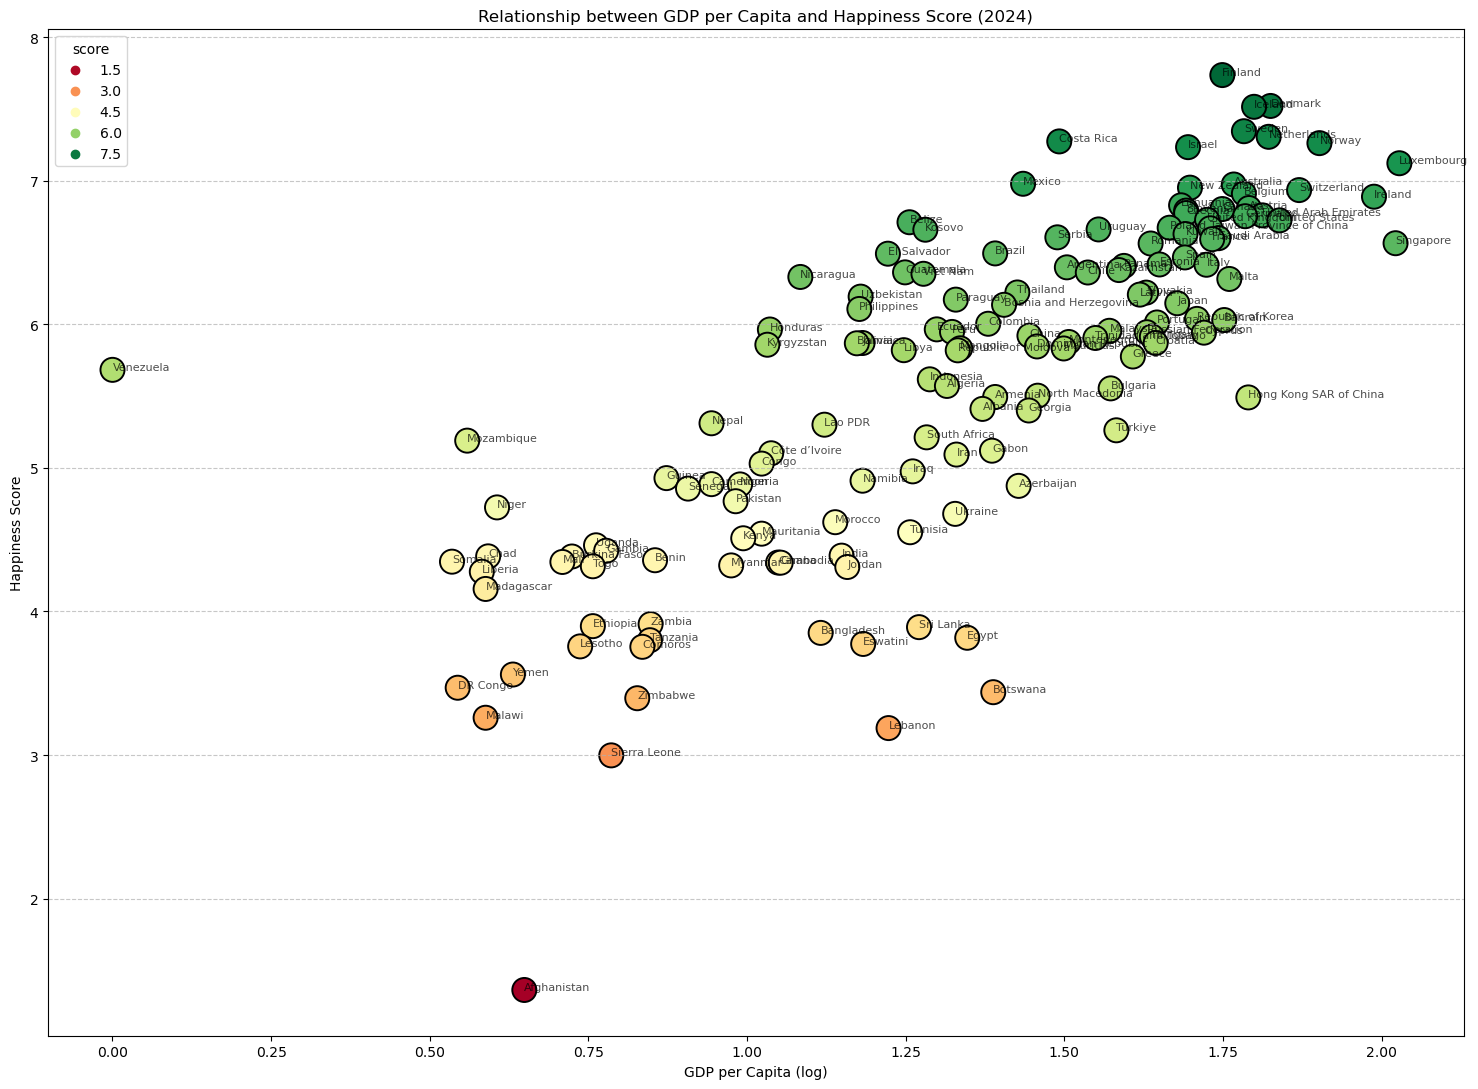

In [59]:
plt.figure(figsize=(15,11))

sns.scatterplot(
    data=df2024,
    x="gdp",
    y="score",
    s=300,
    hue="score",              
    palette="RdYlGn",
    edgecolor="black"
)
for i, row in df2024.iterrows():
    plt.text(row["gdp"], row["score"], row["country"], fontsize=8, alpha=0.7)


plt.title("Relationship between GDP per Capita and Happiness Score (2024)")
plt.xlabel("GDP per Capita (log)")
plt.ylabel("Happiness Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()

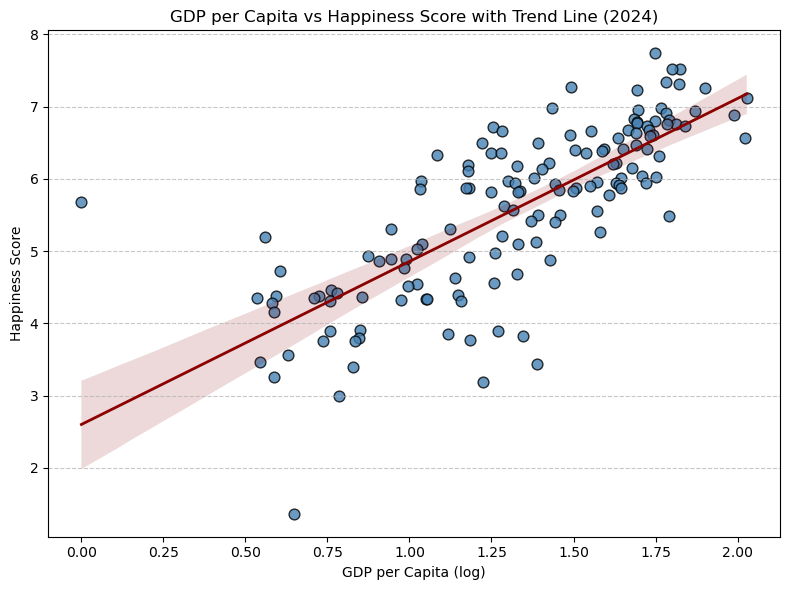

In [60]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df2024,
    x="gdp",
    y="score",
    scatter_kws={"color": "steelblue", "s": 60, "edgecolor": "black"},
    line_kws={"color": "darkred", "linewidth": 2}
)
plt.title("GDP per Capita vs Happiness Score with Trend Line (2024)")
plt.xlabel("GDP per Capita (log)")
plt.ylabel("Happiness Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8-Compare Continents or Regions 


In [61]:
#pip install pycountry_convert 

In [62]:
#adding Continents 
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return "Other"  # Eşleşmeyen ülkelere

df2024["continent"] = df2024["country"].apply(country_to_continent)

df2024.head()

C:\Users\efede\AppData\Local\Temp\ipykernel_12920\3147285694.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,rank,country,score,upperwhisker,lowerwhisker,gdp,social_support,health,freedom,generosity,corruption,dystopia_residual,continent
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782,Europe
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535,Europe
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659,Europe
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385,Europe
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583,Europe


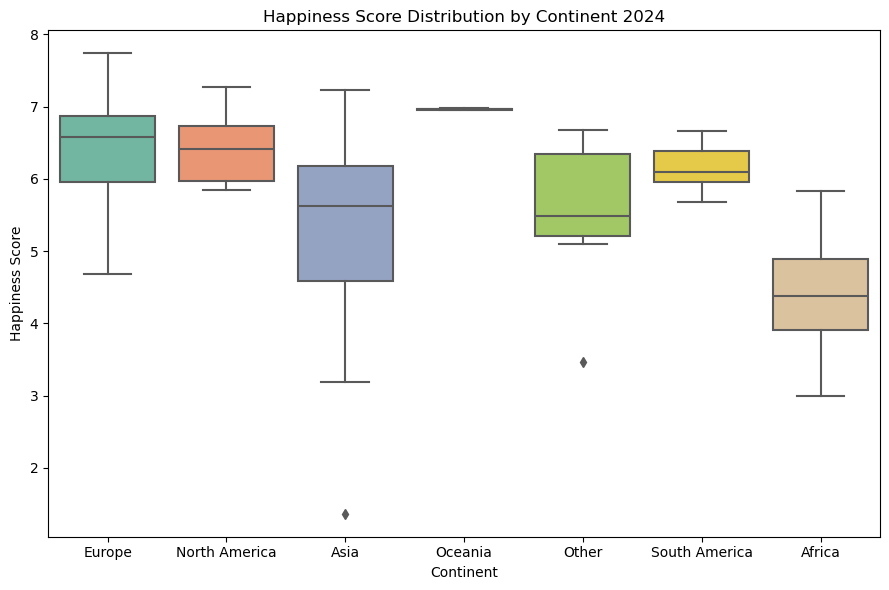

In [63]:
plt.figure(figsize=(9,6))

sns.boxplot(
    data=df2024,
    x="continent",
    y="score",
    palette="Set2"
)
plt.title("Happiness Score Distribution by Continent 2024")
plt.xlabel("Continent")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

9 -Indicator Importance

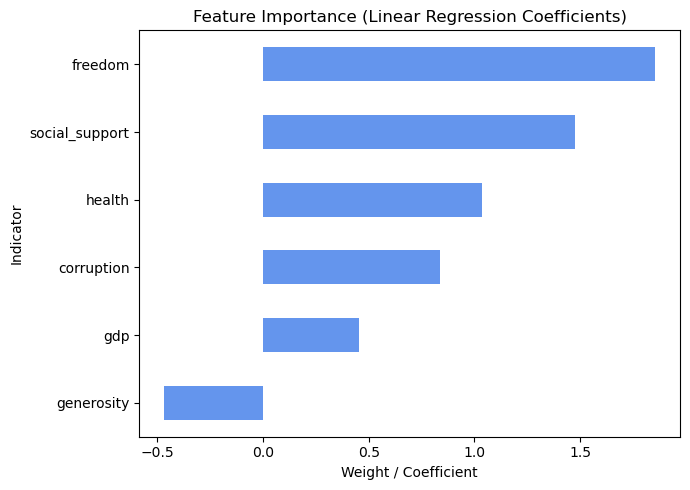

In [64]:
from sklearn.linear_model import LinearRegression
features = ["gdp", "social_support", "health", "freedom", "generosity", "corruption"]
X = df2024[features]
y = df2024["score"]

model = LinearRegression()
model.fit(X, y)

#weights
coefs = pd.Series(model.coef_, index=features).sort_values()

plt.figure(figsize=(7,5))
coefs.plot(kind="barh", color="cornflowerblue")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Weight / Coefficient")
plt.ylabel("Indicator")
plt.tight_layout()
plt.show()

10- Interactive Dashboard is on another python notebook


11- Trend of Happiness vs. Corruption Perception

d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\codinguser\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



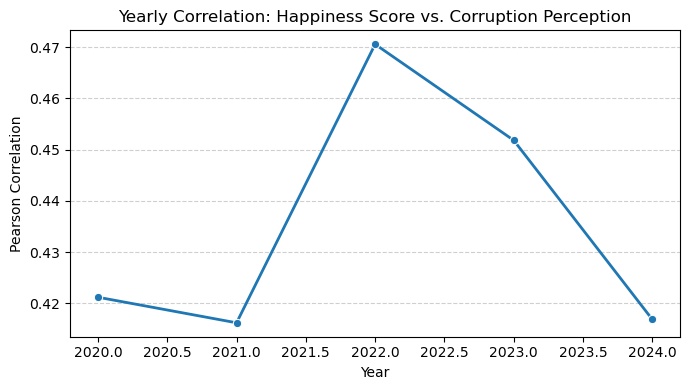

In [72]:
cor_per_year = (
    df2025.groupby("year")
    .apply(lambda x: x["corruption"].corr(x["score"]))
    .reset_index(name="correlation")
)

plt.figure(figsize=(7,4))
sns.lineplot(data=cor_per_year, x="year", y="correlation", marker='o', linewidth=2)
plt.title("Yearly Correlation: Happiness Score vs. Corruption Perception")
plt.xlabel("Year")
plt.ylabel("Pearson Correlation")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

12- Cluster Countries by Happiness Factors 

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# 1. Select features for clustering
features = ["gdp", "social_support", "health"]

# 2. Fill missing values (if any) with the column mean
df_kmeans = df2024[features].fillna(df2024[features].mean())

# 3. Standardize features (important for K-Means!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

# 4. Fit K-Means algorithm (choose number of clusters, e.g., k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 5. Add cluster labels to your DataFrame
df2024["cluster"] = clusters

# 6. 2D Scatter plot (e.g., GDP vs Health, colored by cluster)
fig = px.scatter(
    df2024,
    x="gdp",
    y="health",
    color="cluster",
    hover_name="country",
    title="K-Means Clustering of Countries (2024)",
    labels={"gdp": "GDP per Capita", "health": "Healthy Life Expectancy"},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()


d:\codinguser\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\efede\AppData\Local\Temp\ipykernel_12920\4014959930.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



13- Animated Map of Happiness Over Time 

In [76]:


fig = px.choropleth(
    df2025,
    locations="country",
    locationmode="country names",
    color="score",
    color_continuous_scale="RdYlGn",
    animation_frame="year",
    range_color=(df2025["score"].min(), df2025["score"].max()),
    title="Animated World Happiness Scores (2020–2024)",
    labels={"score": "Happiness Score", "country": "Country"}
)

fig.update_geos(showcoastlines=True, showland=True, landcolor="white", projection_type="natural earth")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

14- Happiness Score vs. Freedom of Choice 


In [77]:
df_year = df2025[df2025["year"] == 2024]

fig = px.scatter(
    df_year,
    x="freedom",
    y="score",
    size="gdp",                  # Bubble size: GDP per capita
    color="score",               # Optional: Color by happiness score
    hover_name="country",
    size_max=60,                 # Adjust max bubble size for readability
    color_continuous_scale="RdYlGn",
    title="Freedom of Choice vs. Happiness Score (Bubble size = GDP per Capita, 2024)",
    labels={"freedom": "Freedom to Make Life Choices", "score": "Happiness Score", "gdp": "GDP per Capita"}
)
fig.show()

15- Country Profile Dashboard on another notebook